In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import sys 
from utils.plot import plot_stroke
from utils.data_generator import DataGenerator
from utils.data_utils import convert_one_hot_encoding_to_sentence

sys.path.insert(0,'..')

strokes_file_path = './data/strokes.npy'
labels_file_path = './data/sentences.txt'
batch_size = 30
max_num_of_chars = 50
sequence_length = 600

In [2]:
datagen = DataGenerator(strokes_file_path=strokes_file_path, labels_file_path=labels_file_path)

In [3]:
batch_generator_unconditional, validation_set_unconditional = datagen.generate_unconditional_dataset(
                                                                batch_size=batch_size,
                                                                sequence_length=sequence_length)

In [4]:
batch_generator_conditional, validation_set_conditional = datagen.generate_conditional_dataset(
                                                            batch_size=batch_size,
                                                            max_num_of_chars=max_num_of_chars,
                                                            sequence_length=sequence_length)

In [5]:
stokes_t_un, target_un = next(batch_generator_unconditional)
stokes_t_c, target_c, sentences_input = next(batch_generator_conditional)

In [6]:
#looking at the processed data
print(np.shape(stokes_t_un))

(30, 600, 3)


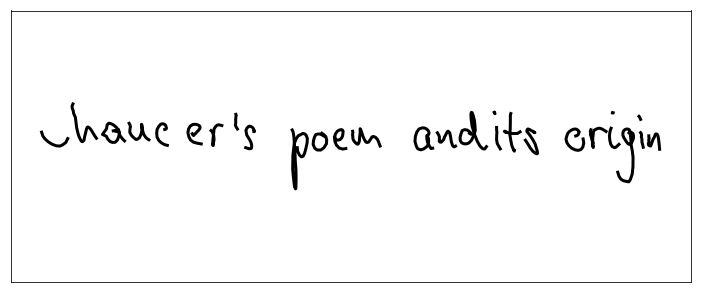

In [7]:
plot_stroke(stokes_t_un[2])

In [8]:
convert_one_hot_encoding_to_sentence(datagen.alphabet, sentences_input[2])

"Of Chaucer's poem and its origins"

In [9]:
lengths = []
for i in range(len(datagen.train_sentences)):
    lengths.append(len(datagen.train_sentences[i]))

In [10]:
print(np.max(lengths))
print(np.min(lengths))
print(np.mean(lengths))

59
9
30.702564102564104
